In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

In [2]:
month_dict = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
day_dict = {'sun':1, 'mon':2, 'tue':3, 'wed':4, 'thu':5, 'fri':6, 'sat':7}

In [3]:
dataset = pd.read_csv('forestfires.csv')

for i in range(len(dataset.month)):
    dataset.month[i]= month_dict[dataset.month[i]]
    
for i in range(len(dataset.day)):
    dataset.day[i]= day_dict[dataset.day[i]]

dataset.head()

/Users/jeanlima/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/jeanlima/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [44]:
y = dataset['area']
x = dataset.drop(['area'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.05)

In [83]:
MLP = MLPRegressor(hidden_layer_sizes=(3,3),
                     max_iter=10000, 
                     activation='identity', 
                     learning_rate='adaptive',
                     learning_rate_init=0.005,
                     batch_size = 16,
                     solver = 'lbfgs')
MLP.fit(X_train, Y_train)

MLPRegressor(activation='identity', alpha=0.0001, batch_size=16, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 3), learning_rate='adaptive',
       learning_rate_init=0.005, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

MSE: 4129.729007613299


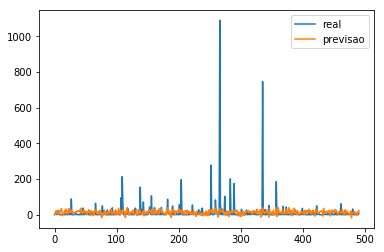

In [84]:
pred = MLP.predict(X_train)

print('MSE:', mean_squared_error(Y_train, pred))

plt.plot(list(Y_train), label='real')
plt.plot(list(pred), label='previsao')
plt.legend()
plt.show()

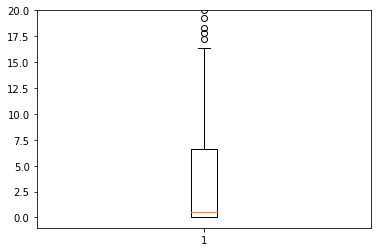

In [96]:
plt.boxplot(list(dataset.area))
plt.axis([0,2,-1, 20])
plt.show()

In [93]:
dataset.area

12.847292069632491